 !kaggle datasets download -d abdallahalidev/plantvillage-dataset

In [14]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [18]:
from tensorflow import keras 
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("potato_disease",
                                                             shuffle= True,
                                                             image_size= (256, 256),
                                                             batch_size= 32)

Found 2152 files belonging to 3 classes.


In [22]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [23]:
print(len(dataset))

68


In [25]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0]


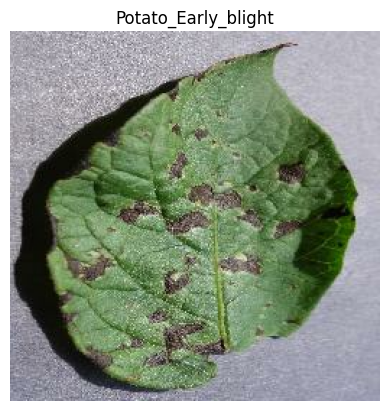

In [30]:
# displaying certain images
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

In [47]:
# Now we be splitting our dataset int training , validation and testing dataset

def dataset_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = (train_split * ds_size)
    val_size = (val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds



In [48]:
dataset_split

<function __main__.dataset_split(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000)>

In [49]:
len(train_ds)

54

In [50]:
len(test_ds)

8

In [51]:
len(val_ds)

6

In [55]:
# resizing and rescaling the incomming data
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1/255.)
])

In [59]:
# Doing data Augmentation

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])


In [73]:
# Building our model 

BATCH_SIZE = 32
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS )
n_classes = 3


model_1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model_1.build(input_shape=input_shape)

In [74]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_22 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [86]:
# compiling the model 
model_1.compile(optimizer = 'adam',
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics = ['accuracy'])

In [87]:
# fitting our model 

EPOCHS=20

history = model_1.fit(train_ds,
                     epochs = EPOCHS,
                     batch_size = BATCH_SIZE,
                     validation_data = val_ds)

Epoch 1/20
54/54 [==============================] - 326s 6s/step - loss: 0.7791 - accuracy: 0.6233 - val_loss: 0.6277 - val_accuracy: 0.7708
Epoch 2/20
54/54 [==============================] - 240s 4s/step - loss: 0.4916 - accuracy: 0.8189 - val_loss: 0.4576 - val_accuracy: 0.8333
Epoch 3/20
54/54 [==============================] - 244s 4s/step - loss: 0.3528 - accuracy: 0.8600 - val_loss: 0.2781 - val_accuracy: 0.8906
Epoch 4/20
54/54 [==============================] - 221s 4s/step - loss: 0.2785 - accuracy: 0.8866 - val_loss: 0.2822 - val_accuracy: 0.9219
Epoch 5/20
54/54 [==============================] - 207s 4s/step - loss: 0.2508 - accuracy: 0.9074 - val_loss: 0.2331 - val_accuracy: 0.8854
Epoch 6/20
54/54 [==============================] - 184s 3s/step - loss: 0.1798 - accuracy: 0.9381 - val_loss: 0.2233 - val_accuracy: 0.9219
Epoch 7/20
54/54 [==============================] - 175s 3s/step - loss: 0.1494 - accuracy: 0.9462 - val_loss: 0.0705 - val_accuracy: 0.9688
Epoch 8/20
54

In [88]:
# evaluating the model againt test data 
model_1.evaluate(test_ds)

8/8 [==============================] - 44s 1s/step - loss: 0.0576 - accuracy: 0.9828


[0.05761575326323509, 0.982758641242981]

In [91]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [93]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

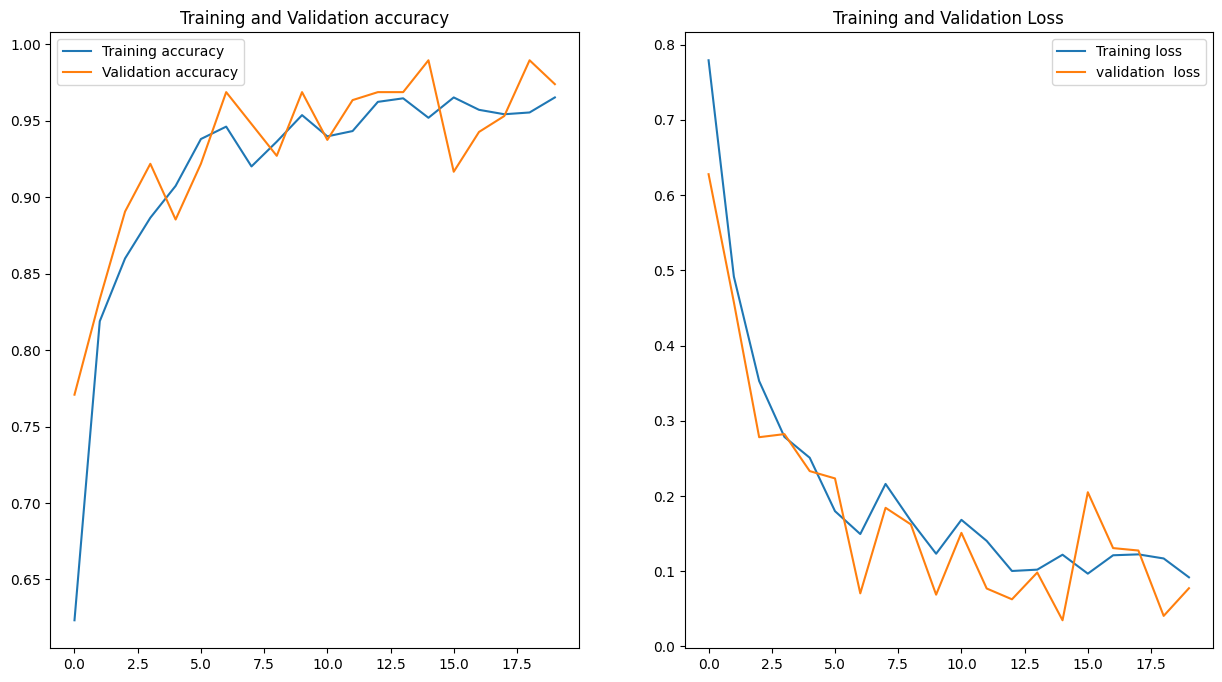

In [107]:
plt.figure(figsize =(15,8))
plt.subplot(1,2,1)
plt.plot(accuracy, label="Training accuracy")
plt.plot( val_accuracy, label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label="Training loss")
plt.plot( val_loss, label="validation  loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

ist image to predict 
actual Label : Potato_Early_blight
1/1 [==============================] - 1s 850ms/step
Model Prediction : Potato_Early_blight


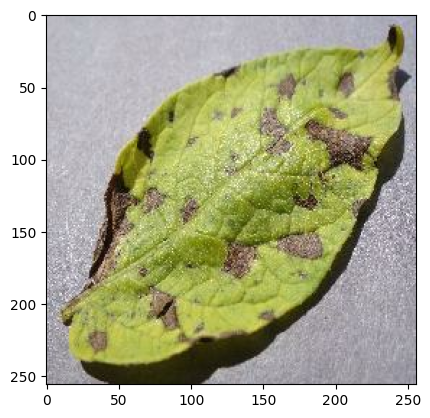

In [113]:
# doing image prediction 
import numpy  as np
for images_batch, labels_batch  in test_ds.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("ist image to predict ")
    plt.imshow(first_image)
    print("actual Label :", class_names[first_label])
    
    batch_prediction = model_1.predict(images_batch)
    print("Model Prediction :",class_names[np.argmax(batch_prediction[0])])
    

In [115]:
model_version = 1
model_1.save(f'../Potato_models/{model_version}')

INFO:tensorflow:Assets written to: ../Potato_models/1\assets


INFO:tensorflow:Assets written to: ../Potato_models/1\assets
